In [1]:
!nvidia-smi

Thu Jun 12 05:20:08 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Upload image dataset and preparte training data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

!cp "/content/drive/MyDrive/Machine Learning/traffic_object_detection/traffic_dataset.zip" /content

Mounted at /content/drive


# Split images into training and validation folders

In [3]:
!unzip -q /content/traffic_dataset.zip -d /content/traffic_dataset

# Install requirements (Ultralytics)

In [5]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.7 MB/s eta 0:00:00


In [6]:
!yolo detect train data=/content/traffic_dataset/data.yaml model=yolo11s.pt epochs=75 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 18.4M/18.4M [00:00<00:00, 35.9MB/s]
Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/traffic_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=75, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=6

# Testing the model

In [8]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=/content/traffic_dataset/test/images save=True

Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,735 parameters, 0 gradients, 21.3 GFLOPs

image 1/25 /content/traffic_dataset/test/images/frame00158_jpg.rf.e75c3102aa910b010a9110413755bb1e.jpg: 640x640 17 cars, 1 truck, 6 vans, 16.2ms
image 2/25 /content/traffic_dataset/test/images/frame00162_jpg.rf.79bc72e4048f03e4680326bb6ba03f81.jpg: 640x640 21 cars, 2 trucks, 6 vans, 15.7ms
image 3/25 /content/traffic_dataset/test/images/frame00163_jpg.rf.6a966d6847a9dd7f024b297172e7b456.jpg: 640x640 19 cars, 2 trucks, 9 vans, 15.6ms
image 4/25 /content/traffic_dataset/test/images/frame00164_jpg.rf.30b372cea39ee63cda7613a59432f3af.jpg: 640x640 23 cars, 1 truck, 5 vans, 15.6ms
image 5/25 /content/traffic_dataset/test/images/frame00165_jpg.rf.b043f02555409b8f02991ffbfdf5ff36.jpg: 640x640 20 cars, 1 truck, 5 vans, 15.6ms
image 6/25 /content/traffic_dataset/test/images/frame00170_jpg.rf.be10340d598e37801637a2cdea34990e.jpg: 6

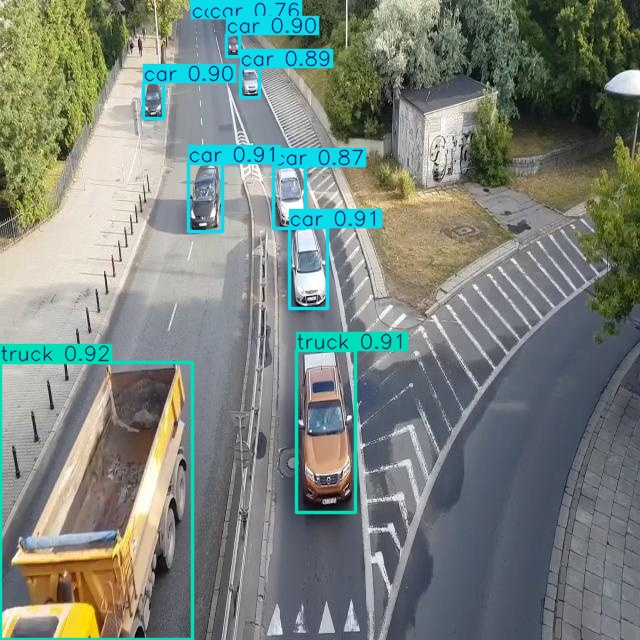

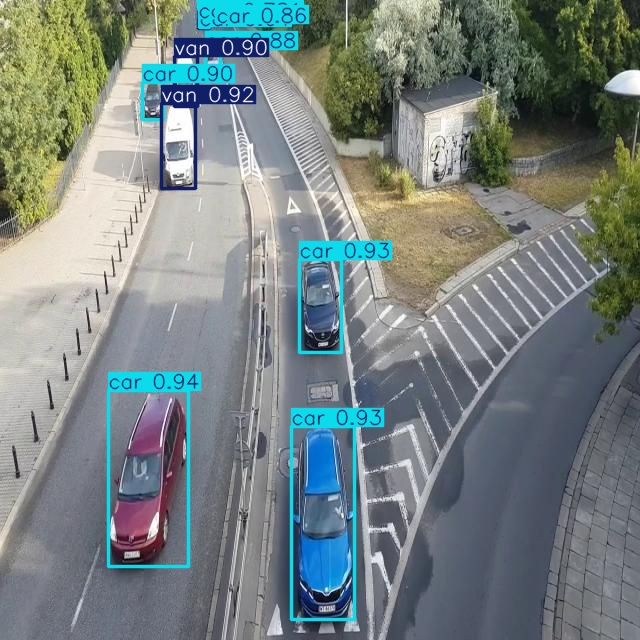

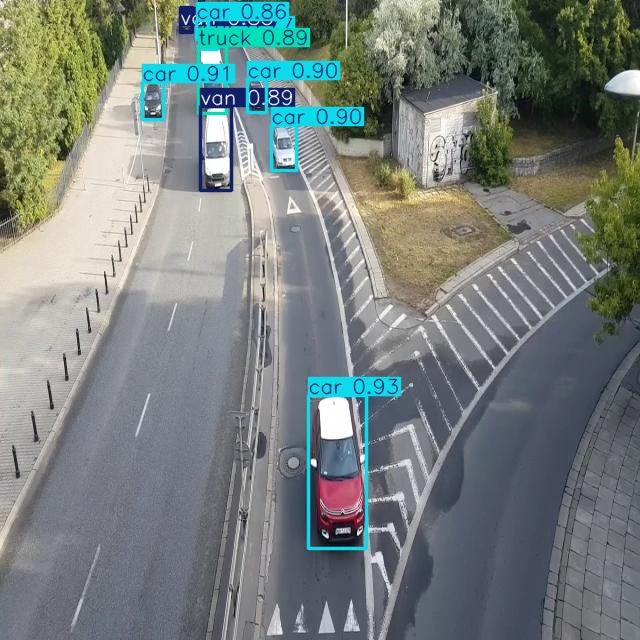

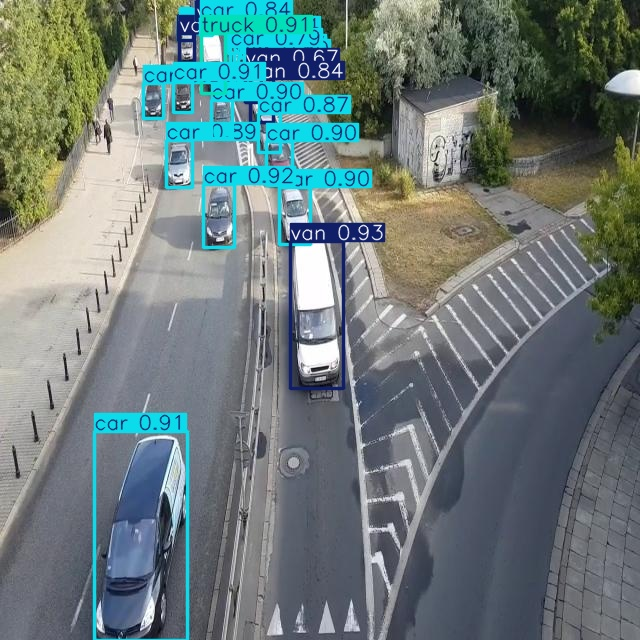

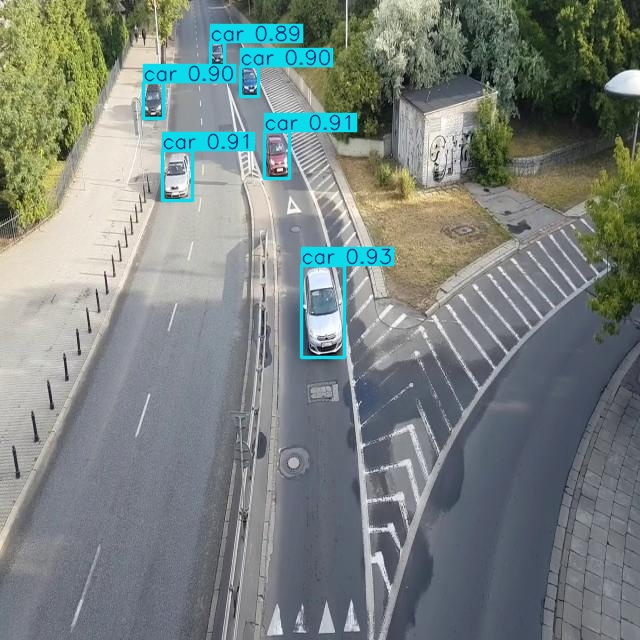

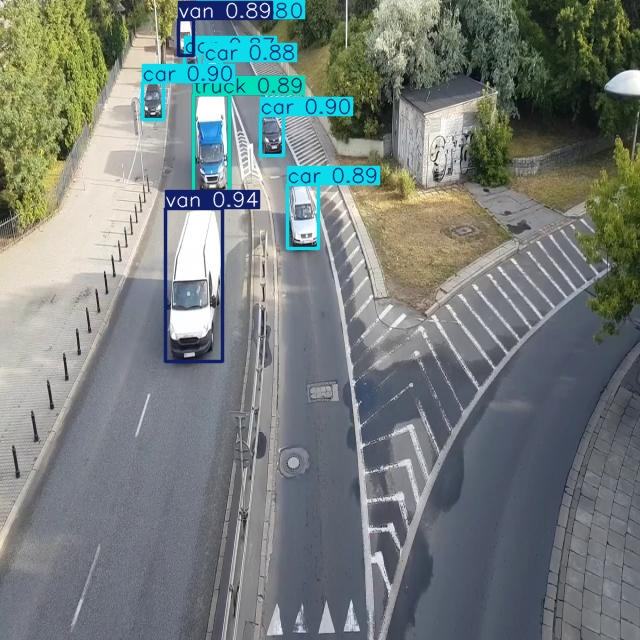

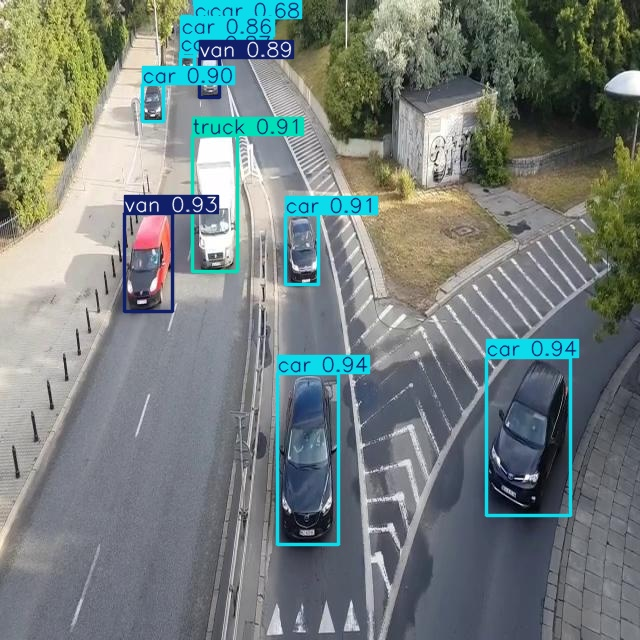

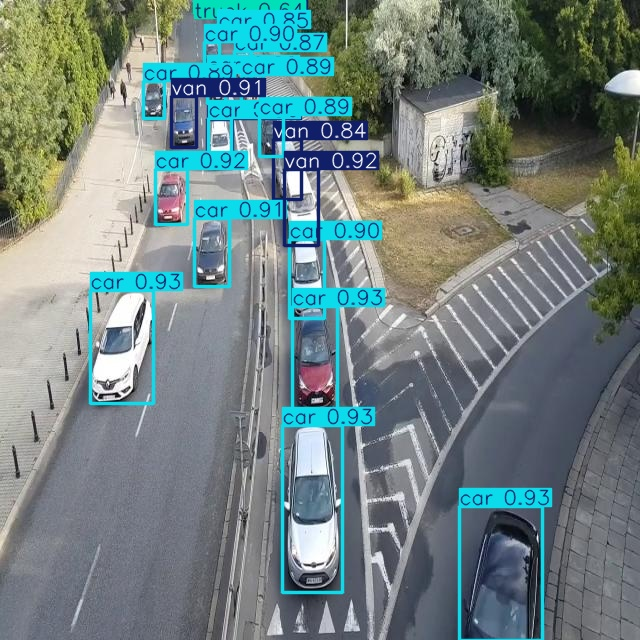

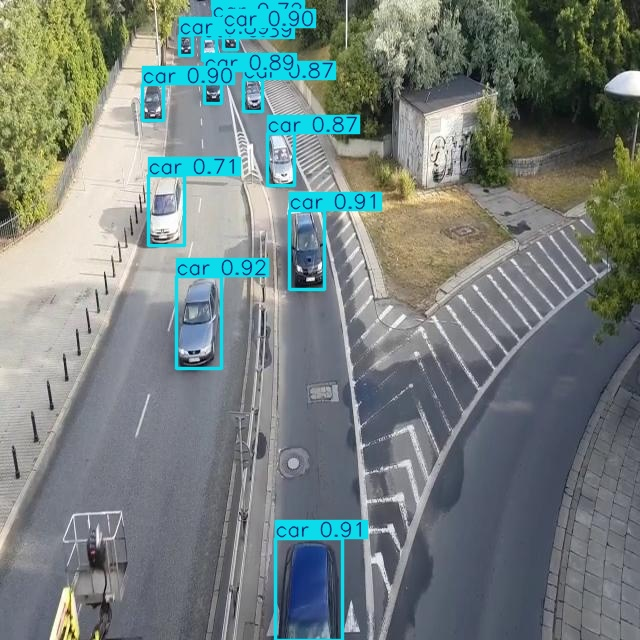

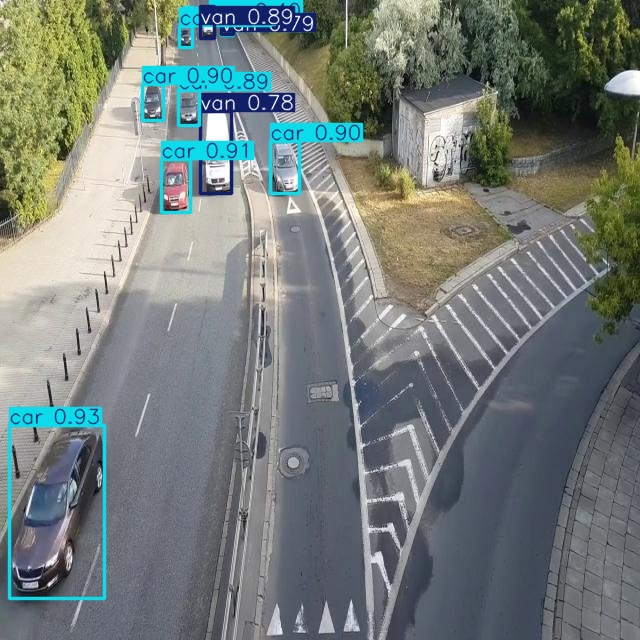

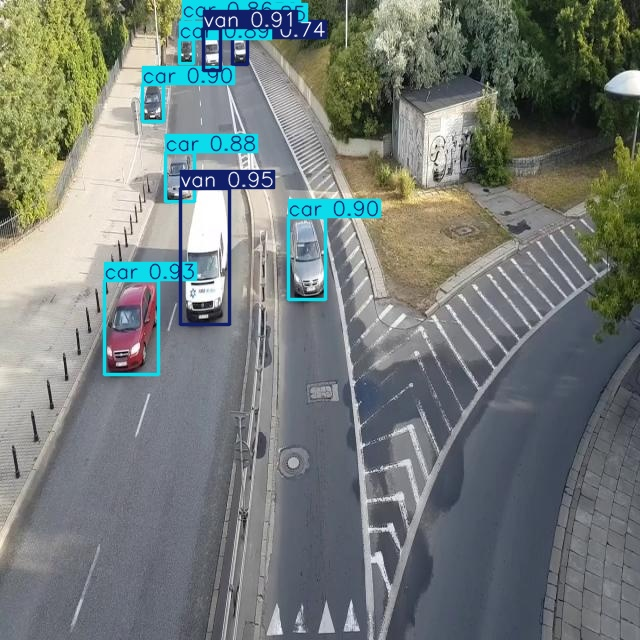

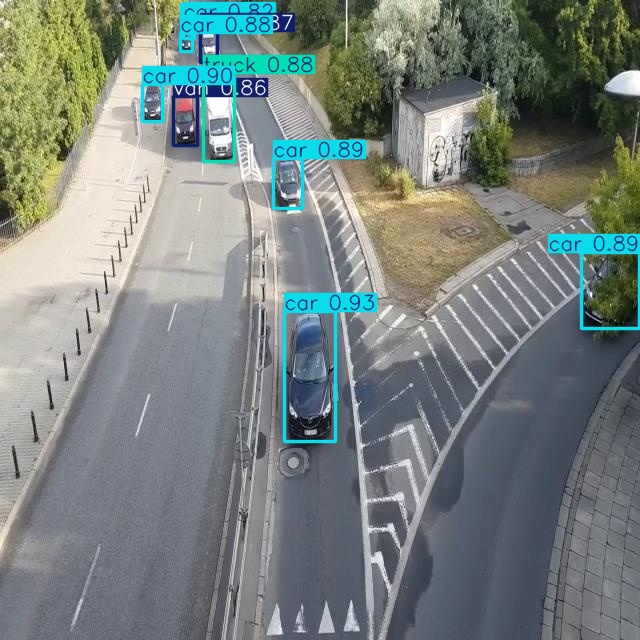

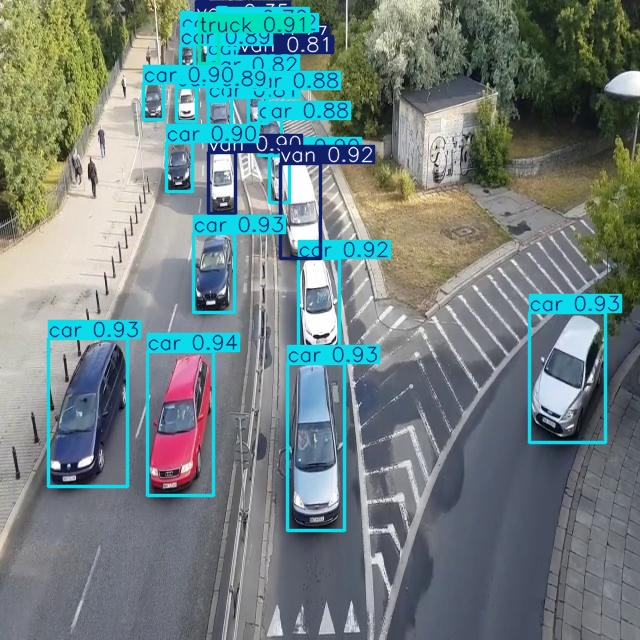

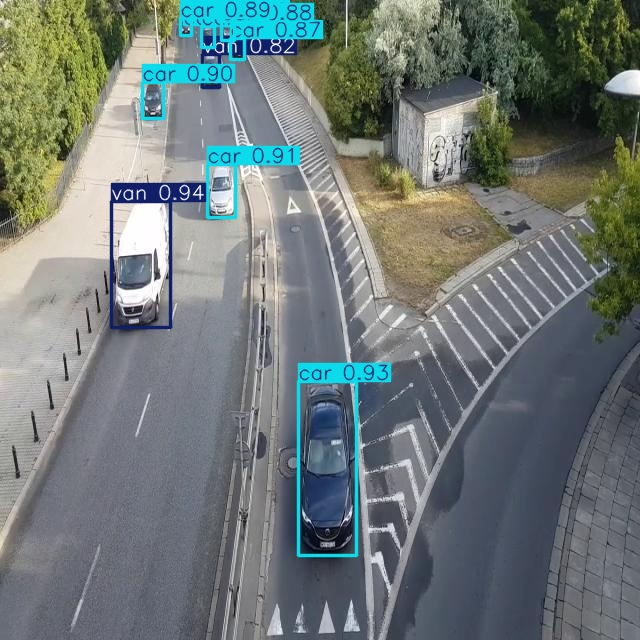

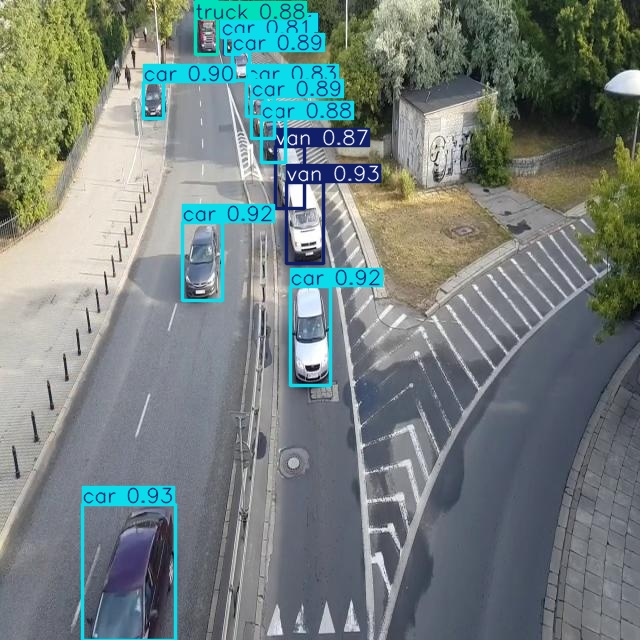

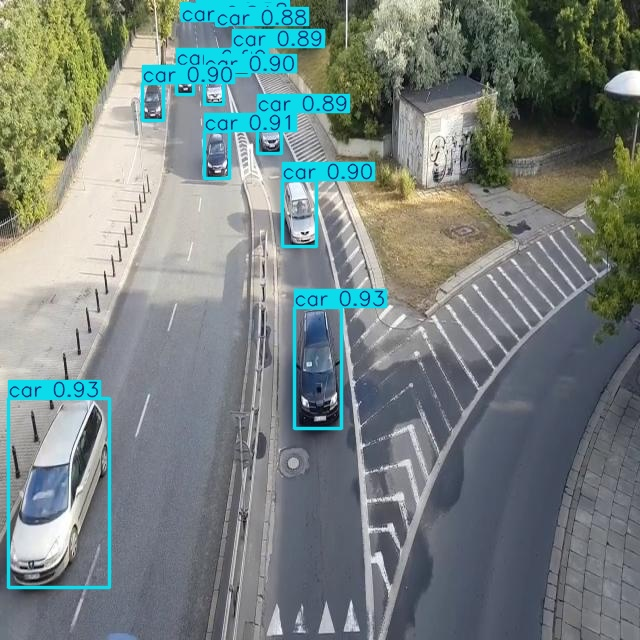

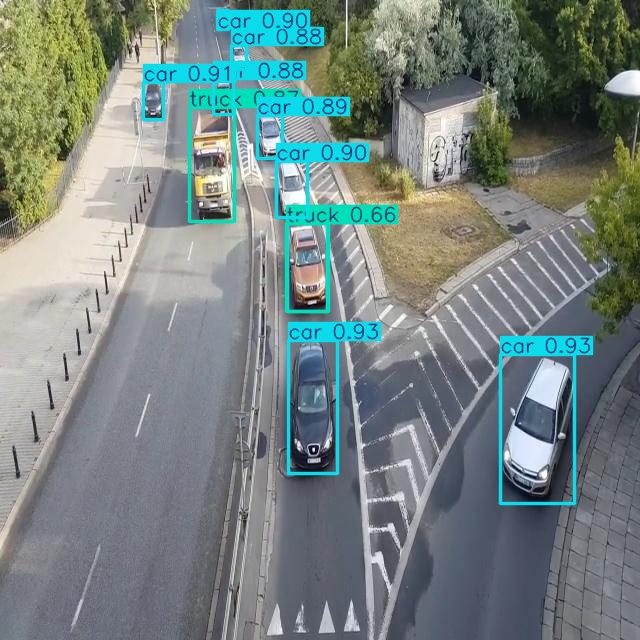

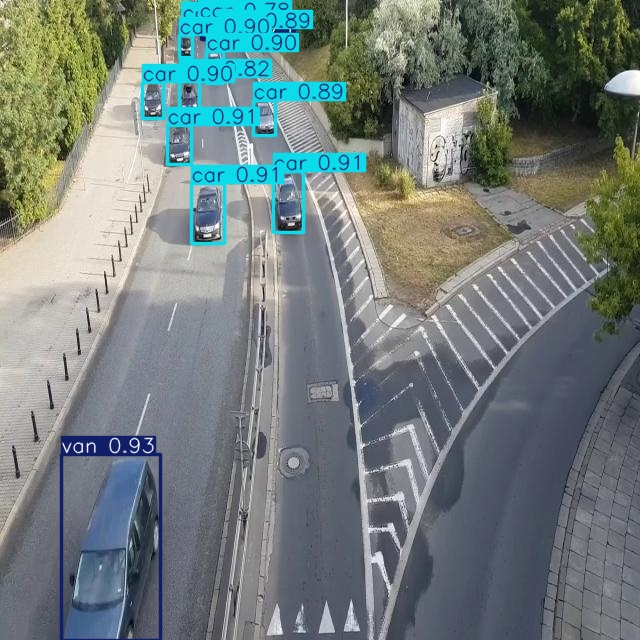

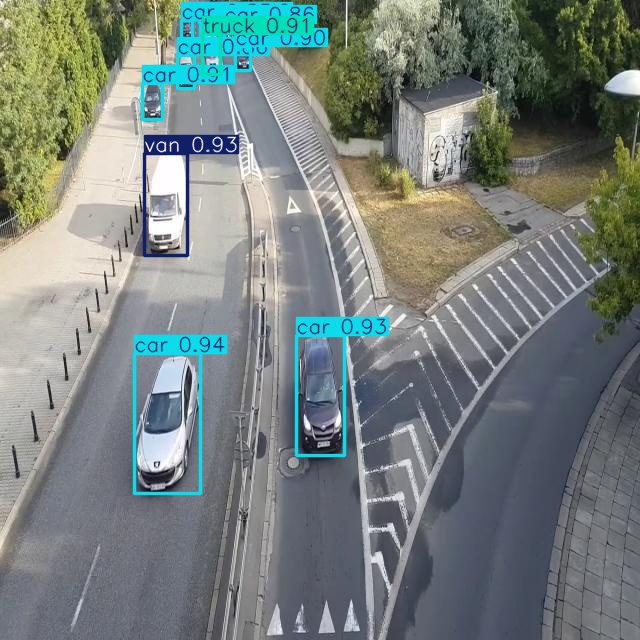

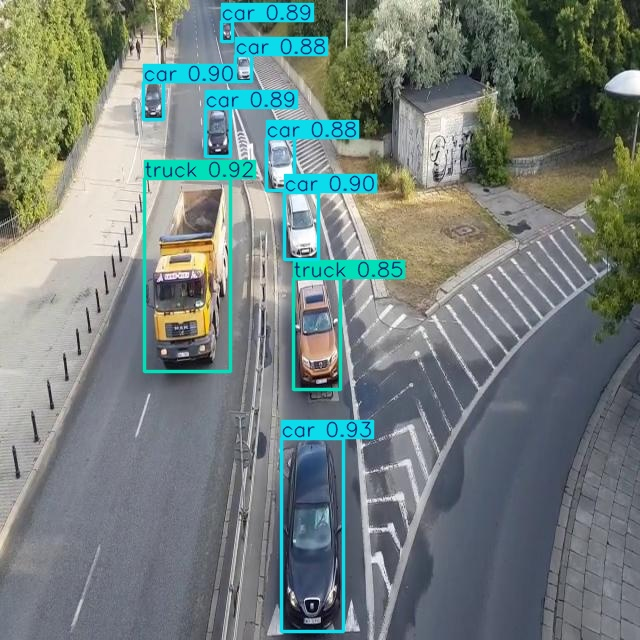

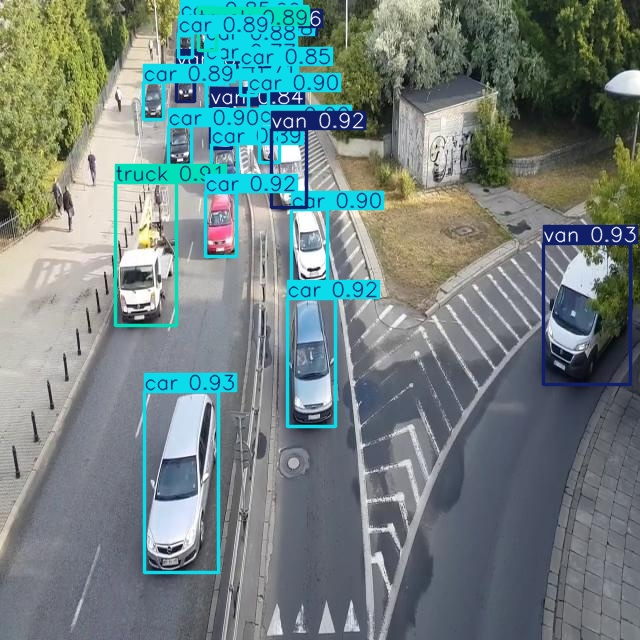

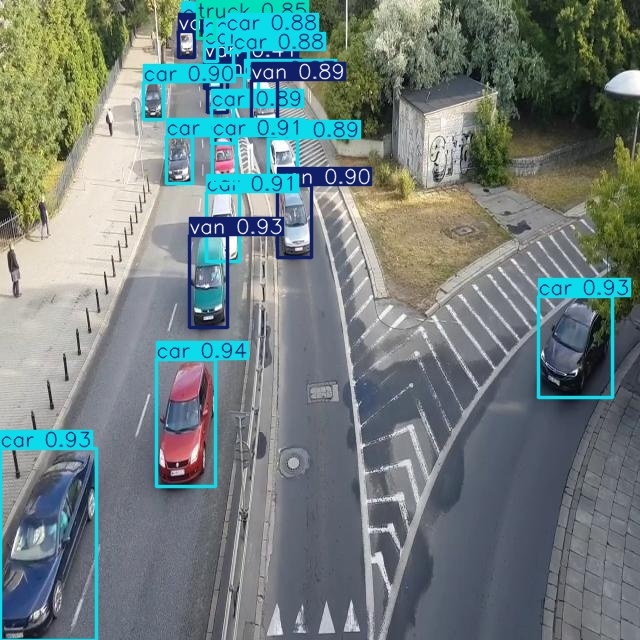

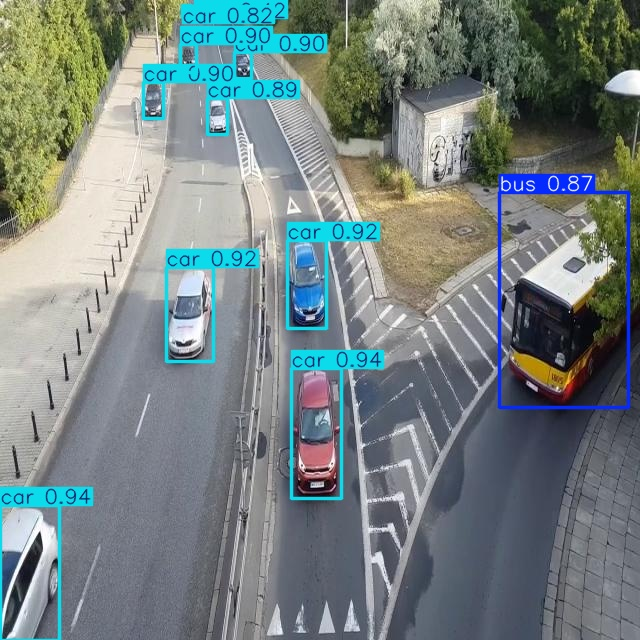

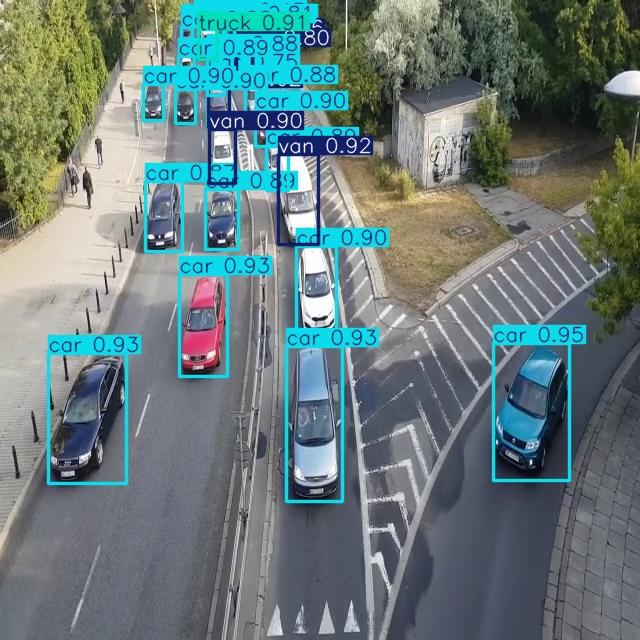

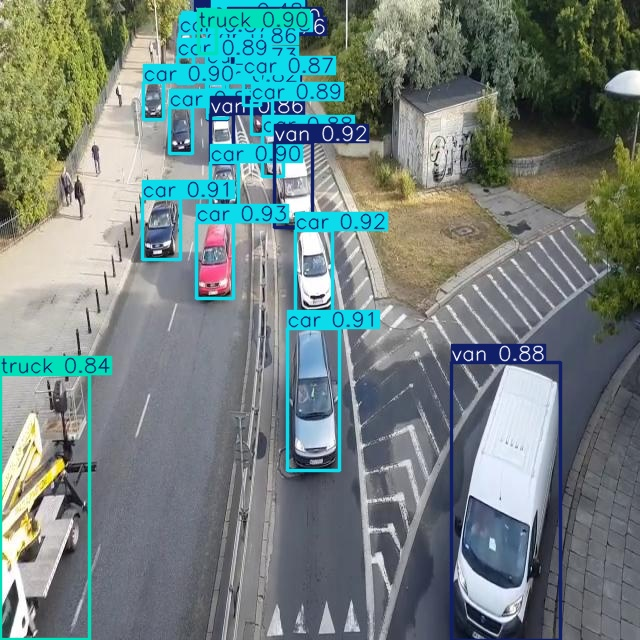

In [9]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict2/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

# Deploy the model

In [10]:
!mkdir /content/traffic_od_model
!cp /content/runs/detect/train/weights/best.pt /content/traffic_od_model/traffic_od_model.pt
!cp -r /content/runs/detect/train /content/traffic_od_model

# Zip the model directory
%cd traffic_od_model
!zip /content/traffic_od_model.zip traffic_od_model.pt
!zip -r /content/traffic_od_model.zip train
%cd /content

/content/traffic_od_model
  adding: traffic_od_model.pt (deflated 8%)
  adding: train/ (stored 0%)
  adding: train/confusion_matrix.png (deflated 29%)
  adding: train/PR_curve.png (deflated 17%)
  adding: train/results.csv (deflated 63%)
  adding: train/args.yaml (deflated 53%)
  adding: train/train_batch2535.jpg (deflated 4%)
  adding: train/P_curve.png (deflated 11%)
  adding: train/labels.jpg (deflated 46%)
  adding: train/val_batch0_pred.jpg (deflated 4%)
  adding: train/train_batch2537.jpg (deflated 3%)
  adding: train/train_batch0.jpg (deflated 1%)
  adding: train/results.png (deflated 7%)
  adding: train/weights/ (stored 0%)
  adding: train/weights/best.pt (deflated 8%)
  adding: train/weights/last.pt (deflated 8%)
  adding: train/F1_curve.png (deflated 8%)
  adding: train/train_batch2536.jpg (deflated 3%)
  adding: train/train_batch1.jpg (deflated 1%)
  adding: train/labels_correlogram.jpg (deflated 40%)
  adding: train/train_batch2.jpg (deflated 1%)
  adding: train/confusion_m